## 네이버쇼핑과 날씨와의 관계
### 1. 데이터 로딩

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pymysql
import pandas as pd

conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT A.productcid
                ,A.productcname
                ,A.level
                ,A.productpath
                ,B.dt
                ,B.productvalue

        FROM NaverShopProductCode AS A
        INNER JOIN NaverShopProductRate AS B
        ON A.productcid = B.productcid
        WHERE 1 = 1
    '''
    cur.execute(sql)
    result_naverShopping = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_naverShopping))

마리아에서 불러온 행 수 : 903401


In [3]:
conn = pymysql.connect(host='multi-bigdata.cljkqcsbb9ok.ap-northeast-2.rds.amazonaws.com',port=3306,user='edu02',passwd='edu02', db='edudb01', cursorclass=pymysql.cursors.DictCursor)
try:
    cur = conn.cursor()
    sql = '''
        SELECT *

        FROM ASOS_Weather_D
        WHERE 1 = 1
        AND DATE BETWEEN '2019-11-01' AND '2020-10-31'
    '''
    cur.execute(sql)
    result_weather = cur.fetchall()
finally:
    conn.close()
print('마리아에서 불러온 행 수 :', len(result_weather))

마리아에서 불러온 행 수 : 6222


In [4]:
# 기간 : 20191101 ~ 20201031
naverShopping = pd.DataFrame(result_naverShopping)
dtweather = pd.DataFrame(result_weather)
dtweather.rename(columns = {'date' : 'dt'}, inplace = True)

In [5]:
display(naverShopping.describe(include='all'))
display(dtweather.describe(include='all'))

,productcid,productcname,level,productpath,dt,productvalue
count,903401,903401,903401,903401,903401,903401.000000
unique,2507,2316,4,2507,366,NaN
top,50000232,청바지,L3,디지털/가전 > 음향가전 > MP3,20201012,NaN
freq,366,1464,652528,366,2498,NaN
mean,NaN,NaN,NaN,NaN,NaN,46.165237
std,NaN,NaN,NaN,NaN,NaN,21.498083
min,NaN,NaN,NaN,NaN,NaN,0.003930
25%,NaN,NaN,NaN,NaN,NaN,30.598700
50%,NaN,NaN,NaN,NaN,NaN,47.330800
75%,NaN,NaN,NaN,NaN,NaN,61.920700


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
count,6222,6222,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000,6222.000000
unique,17,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,제주도,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,366,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,13.753005,8.005529,19.855979,4.601639,6.285632,2.037014,7.670781,70.145950,13.013500,1005.939167,1016.304822,6.182401
std,NaN,NaN,8.577883,9.727665,8.424131,14.819551,3.216525,1.097549,10.460453,15.244375,8.469762,9.492089,8.199593,3.875948
min,NaN,NaN,-8.300000,-24.000000,-4.900000,0.000000,1.400000,0.200000,-20.400000,17.900000,1.200000,966.700000,988.500000,0.000000
25%,NaN,NaN,6.700000,0.000000,12.800000,0.000000,4.200000,1.200000,-1.100000,59.225000,5.700000,999.600000,1010.200000,2.600000
50%,NaN,NaN,13.450000,7.200000,20.500000,0.000000,5.500000,1.800000,7.000000,71.700000,10.200000,1006.200000,1016.200000,7.100000
75%,NaN,NaN,21.400000,16.900000,26.600000,1.100000,7.600000,2.500000,17.300000,81.700000,19.700000,1013.000000,1022.600000,9.300000


In [6]:
# 날짜 format 맞추기
naverShopping['newdt'] = naverShopping['dt'].apply(lambda x : x[0:4] + '-' + x[4:6] + '-' + x[6:8])  
display(naverShopping.head(2))
del naverShopping['dt']
naverShopping.rename(columns = {'newdt' : 'dt'}, inplace = True)
display(naverShopping.head(2))

,productcid,productcname,level,productpath,dt,productvalue,newdt
0,50000000,패션의류,L1,패션의류,20191101,59.1446,2019-11-01
1,50000001,패션잡화,L1,패션잡화,20191101,60.8660,2019-11-01


,productcid,productcname,level,productpath,productvalue,dt
0,50000000,패션의류,L1,패션의류,59.1446,2019-11-01
1,50000001,패션잡화,L1,패션잡화,60.8660,2019-11-01


In [32]:
# naverShopFaFo = naverShopping[naverShopping['productcname'].isin(['패션의류', '식품'])] 
naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2'])] 
# naverShopFaFo = naverShopping[naverShopping['level'].isin(['L2']) & naverShopping['productcname'].isin(['향수'])] 
print(naverShopFaFo.head())
print(naverShopFaFo.count())

   productcid productcname level   productpath  productvalue          dt
11   50000013          화장품    L2     면세점 > 화장품       7.22818  2019-11-01
12   50000014           향수    L2      면세점 > 향수      57.79620  2019-11-01
13   50000015       시계/기프트    L2  면세점 > 시계/기프트      44.35610  2019-11-01
14   50000016          주얼리    L2     면세점 > 주얼리      61.10540  2019-11-01
15   50000017        패션/잡화    L2   면세점 > 패션/잡화      66.41160  2019-11-01
productcid      73532
productcname    73532
level           73532
productpath     73532
productvalue    73532
dt              73532
dtype: int64


In [33]:
naverShop = naverShopFaFo.pivot(index='dt', columns='productpath', values='productvalue')
display(naverShop.head())

productpath,가구/인테리어 > DIY자재/용품,가구/인테리어 > 거실가구,가구/인테리어 > 서재/사무용가구,가구/인테리어 > 솜류,가구/인테리어 > 수납가구,가구/인테리어 > 수예,가구/인테리어 > 아동/주니어가구,가구/인테리어 > 아웃도어가구,가구/인테리어 > 인테리어소품,가구/인테리어 > 주방가구,...,화장품/미용 > 바디케어,화장품/미용 > 베이스메이크업,화장품/미용 > 뷰티소품,화장품/미용 > 색조메이크업,화장품/미용 > 선케어,화장품/미용 > 스킨케어,화장품/미용 > 클렌징,화장품/미용 > 향수,화장품/미용 > 헤어스타일링,화장품/미용 > 헤어케어
dt,,,,,,,,,,,,,,,,,,,,,
2019-11-01,43.7140,39.0560,39.2678,54.2844,46.0585,32.0323,42.2873,25.0720,47.9965,45.0850,...,40.7896,75.4648,37.4143,68.2587,31.2700,74.3832,69.0397,64.5276,58.9951,66.6182
2019-11-02,42.9597,48.8056,40.7708,58.0706,52.0281,31.0844,47.5781,28.0991,52.1933,51.6630,...,37.9796,78.3679,37.3521,68.2583,27.7929,69.4915,67.1366,67.0487,55.2061,63.2784
2019-11-03,50.5578,64.7981,51.7523,69.4510,67.2068,33.9393,62.5100,35.4100,62.9086,65.7258,...,43.9510,90.7237,46.4760,79.4963,33.3103,76.6962,77.3801,71.0244,68.6986,75.7833
2019-11-04,58.9390,55.6398,53.0975,70.7922,66.5805,39.0043,58.6646,35.0069,67.3924,62.8588,...,46.0869,86.8409,45.9765,75.7215,37.2176,83.4310,81.4714,71.5819,72.6468,79.6406
2019-11-05,56.3099,50.2235,48.4230,65.3413,59.9528,39.3257,51.0205,31.5500,64.5617,56.1539,...,44.2022,89.8986,44.4615,76.6870,35.6461,79.7804,79.5288,73.1298,72.4107,82.7542


In [34]:
display(dtweather.head(2))
# seoulWeather = dtweather[dtweather['city'].isin(['서울특별시', '울산광역시'])]
seoulWeather = dtweather[dtweather['city'].isin(['서울특별시'])]
display(seoulWeather.head(2))

# weatherSU = seoulWeather.pivot(index='dt', columns='city', values=['temp_avg', 'amount_of_rain'])
weatherSU = seoulWeather.pivot(index='dt', columns='city', values='temp_avg')
display(weatherSU.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,강원도,2019-11-01,13.1,2.9,23.0,0.0,9.1,1.3,7.6,72.5,10.5,996.2,1021.6,7.6
1,강원도,2019-11-02,12.0,0.4,22.6,0.0,6.3,1.0,7.6,77.2,10.6,994.8,1020.3,4.5


,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
2928,서울특별시,2019-11-01,14.9,11.4,20.5,0.0,3.9,1.8,5.2,57.9,9.4,1011.3,1021.6,9.5
2929,서울특별시,2019-11-02,13.6,8.3,18.7,0.0,2.9,1.5,5.1,57.3,8.9,1009.9,1020.2,3.3


city,서울특별시
dt,
2019-11-01,14.9
2019-11-02,13.6


In [36]:
weatherShop_allP = pd.merge(seoulWeather, naverShop, left_on="dt", right_on="dt", how="outer")

display(weatherShop_allP.head(2))

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,...,화장품/미용 > 바디케어,화장품/미용 > 베이스메이크업,화장품/미용 > 뷰티소품,화장품/미용 > 색조메이크업,화장품/미용 > 선케어,화장품/미용 > 스킨케어,화장품/미용 > 클렌징,화장품/미용 > 향수,화장품/미용 > 헤어스타일링,화장품/미용 > 헤어케어
0,서울특별시,2019-11-01,14.9,11.4,20.5,0.0,3.9,1.8,5.2,57.9,...,40.7896,75.4648,37.4143,68.2587,31.2700,74.3832,69.0397,64.5276,58.9951,66.6182
1,서울특별시,2019-11-02,13.6,8.3,18.7,0.0,2.9,1.5,5.1,57.3,...,37.9796,78.3679,37.3521,68.2583,27.7929,69.4915,67.1366,67.0487,55.2061,63.2784


In [39]:

corrSheet = weatherShop_allP.corr()

corrSheet.to_csv("./data/corrSheet.csv")


In [ ]:
weatherShop = pd.merge(seoulWeather, naverShop, left_on="dt", right_on="dt", how="outer")

display(weatherShop.head(2))

In [171]:
weatherShop2 = pd.merge(weatherShop, seoulWeather, left_on="dt", right_on="dt", how="inner")

display(weatherShop2.count())

dt                       366
서울특별시                    366
가구/인테리어                  366
디지털/가전                   366
면세점                      366
생활/건강                    366
스포츠/레저                   366
식품                       366
여가/생활편의                  366
출산/육아                    366
패션의류                     366
패션잡화                     366
화장품/미용                   366
city                     366
temp_avg                 366
temp_min                 366
temp_max                 366
amount_of_rain           366
wind_vel_max             366
wind_vel_avg             366
dewpoint_avg             366
r_humidity               366
vapor_pressure_avg       366
station_pressure_avg     366
sealevel_pressure_avg    366
daylight_hour            366
dtype: int64

Malgun Gothic


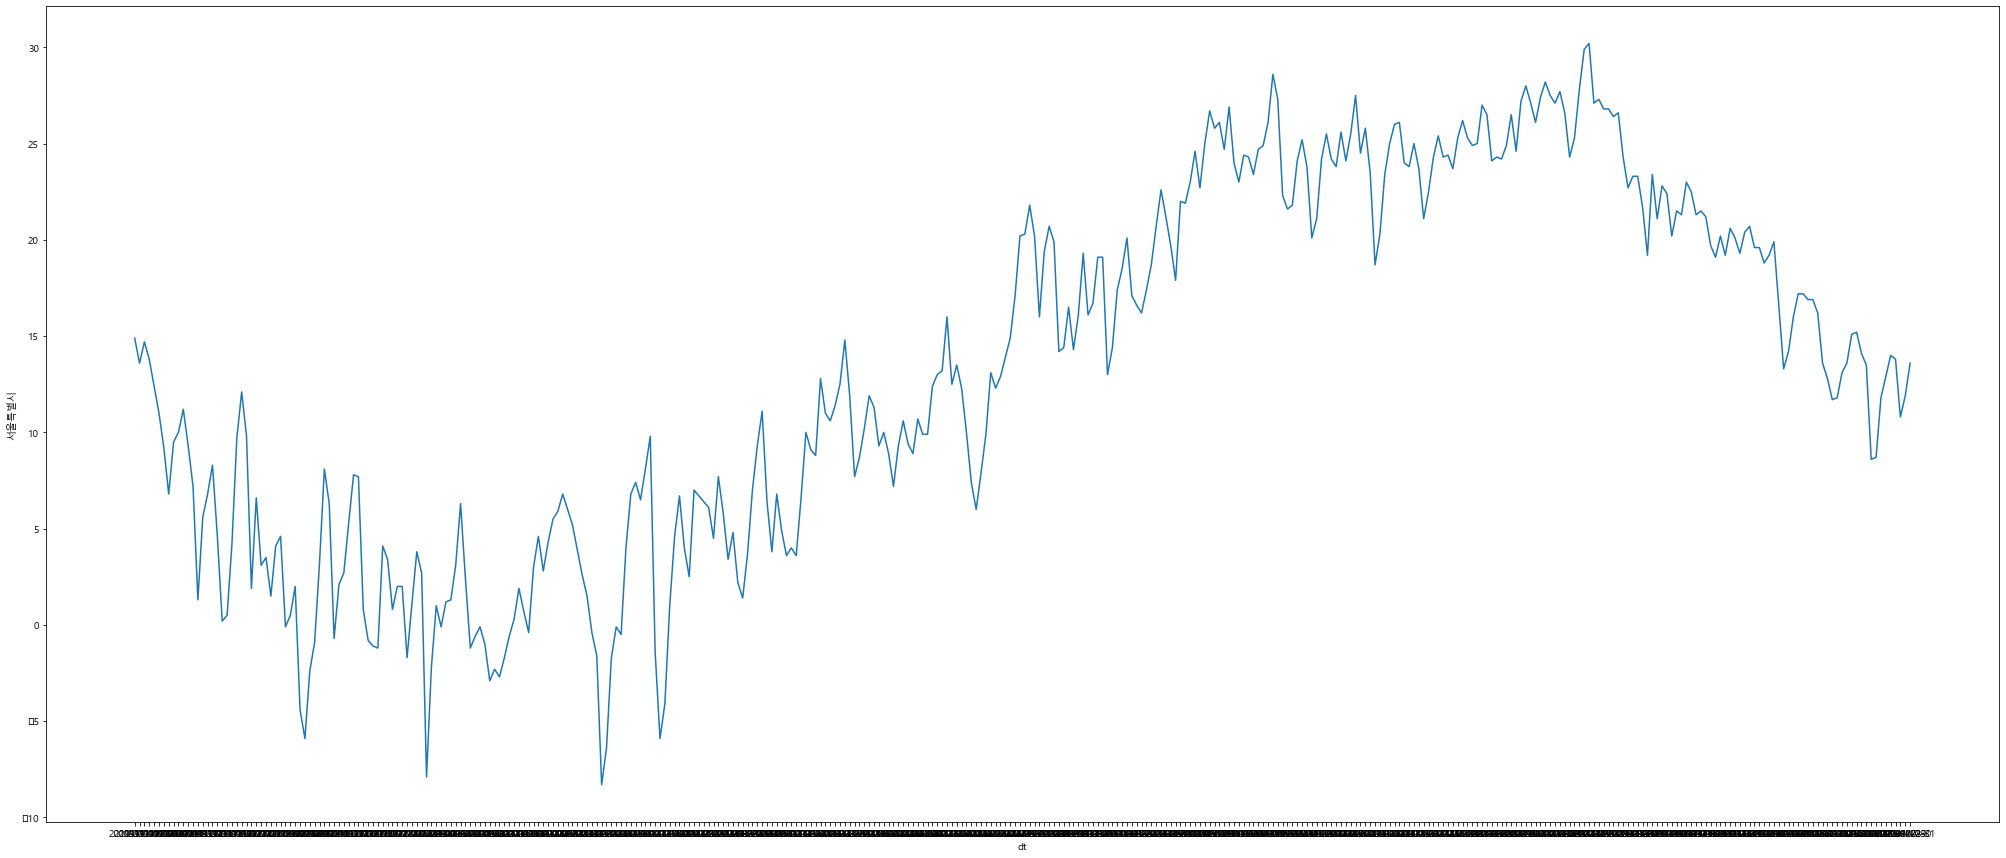

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "/usr/share/fonts/truetype/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
print(font_name)

plt.figure(figsize=(35, 15))
sns.lineplot(x="dt", y="서울특별시", data=weatherSU)


plt.show()

<AxesSubplot:>

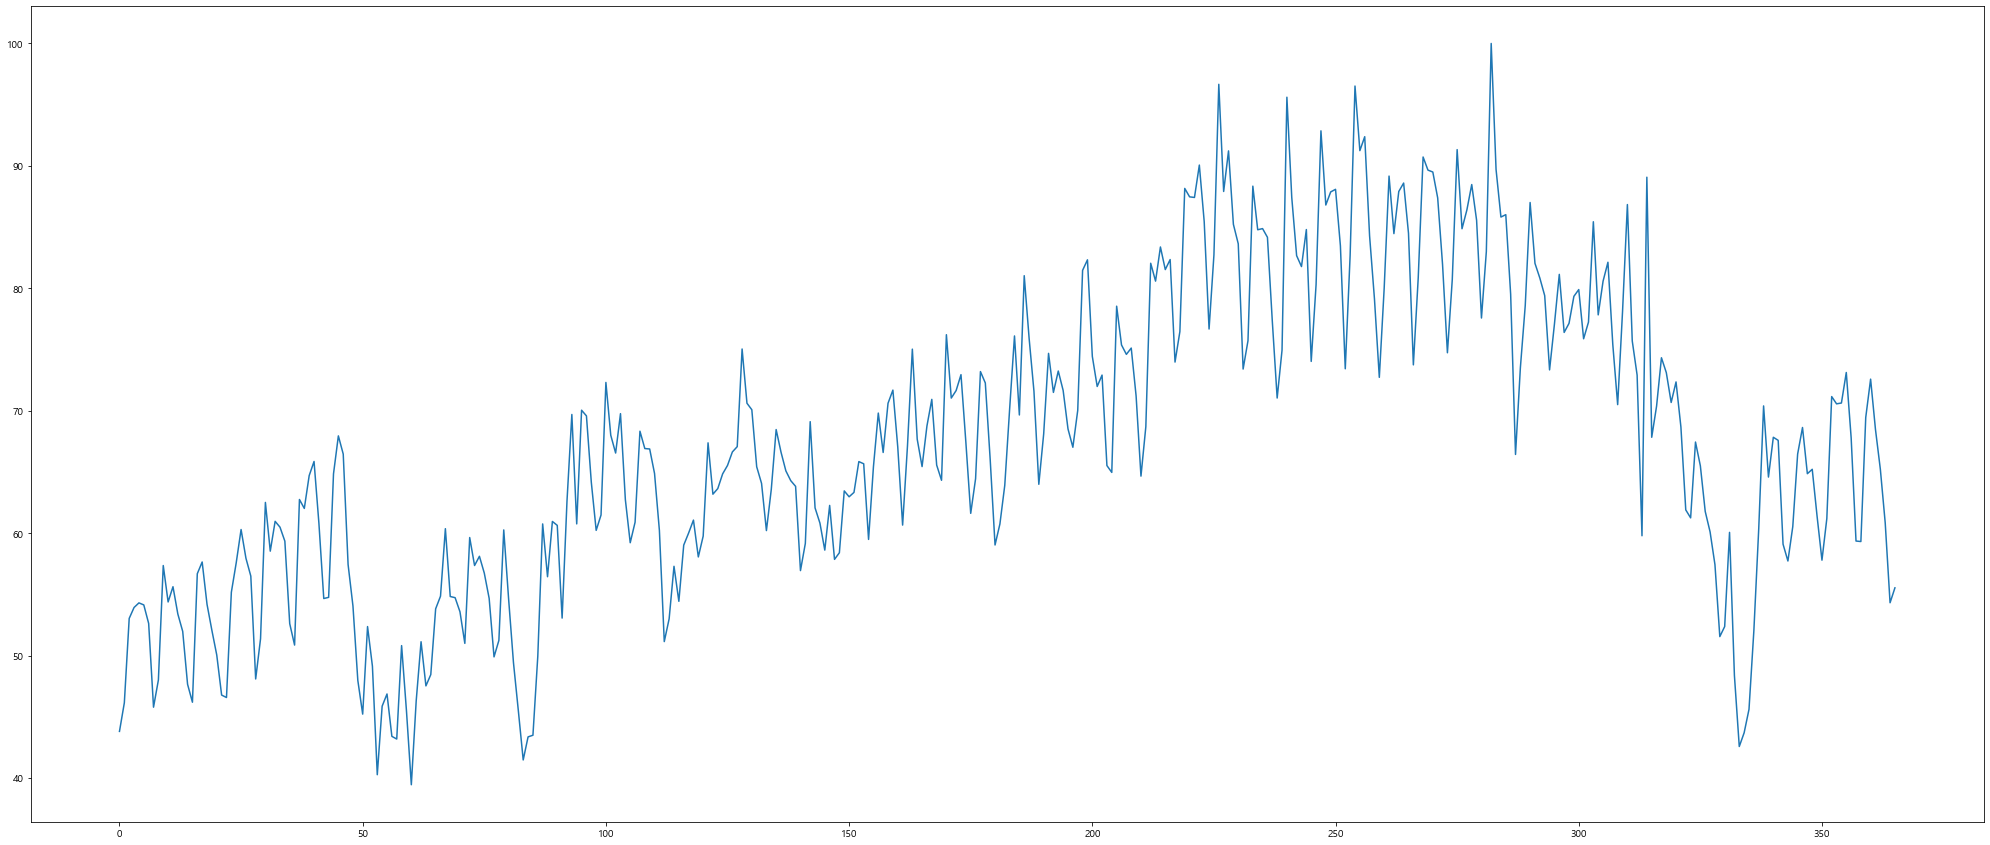

In [44]:
tt = weatherShop_allP['패션잡화 > 헤어액세서리']

plt.figure(figsize=(35, 15))
tt.plot(figsize=(35, 15))

<AxesSubplot:xlabel='서울특별시', ylabel='패션의류'>

/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


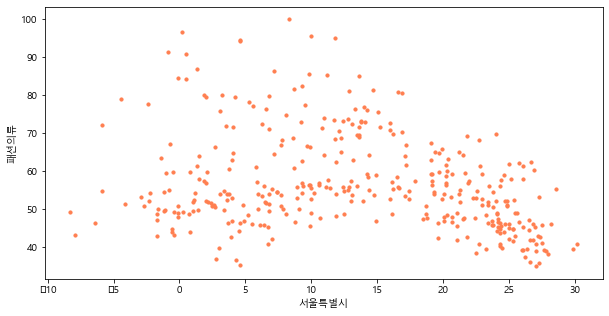

In [120]:

weatherShop.plot(kind='scatter', x='서울특별시', y='패션의류',  c='coral', s=10, figsize=(10, 5))

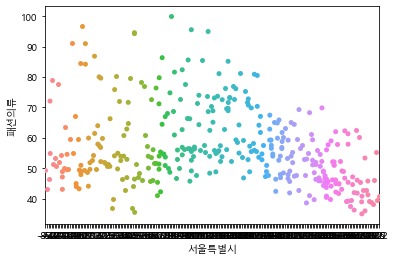

In [121]:
sns.stripplot(x='서울특별시', y='패션의류', data=weatherShop)
plt.show()

<AxesSubplot:xlabel='서울특별시', ylabel='화장품/미용'>

/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


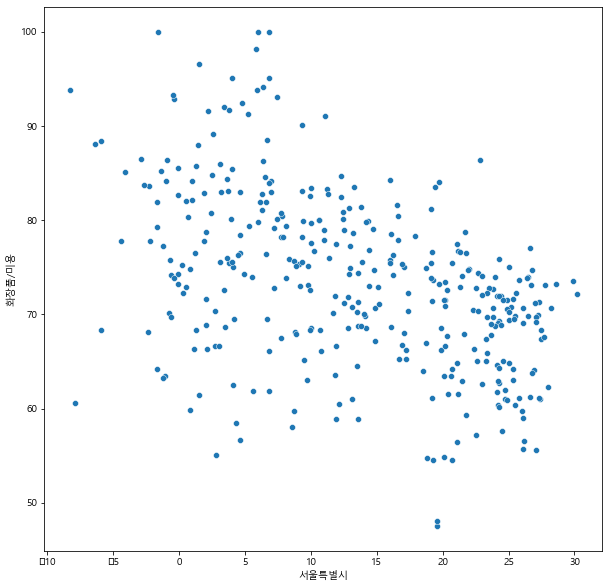

In [133]:
# weatherShop.plot(kind='scatter', x='서울특별시', y='화장품/미용',  c='coral', s=10, figsize=(10, 5))
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="서울특별시", y="화장품/미용", data=weatherShop)

# 가구/인테리어	디지털/가전	면세점	생활/건강	스포츠/레저	식품	여가/생활편의	출산/육아	패션의류	패션잡화	화장품/미용

<AxesSubplot:xlabel='서울특별시', ylabel='화장품/미용'>

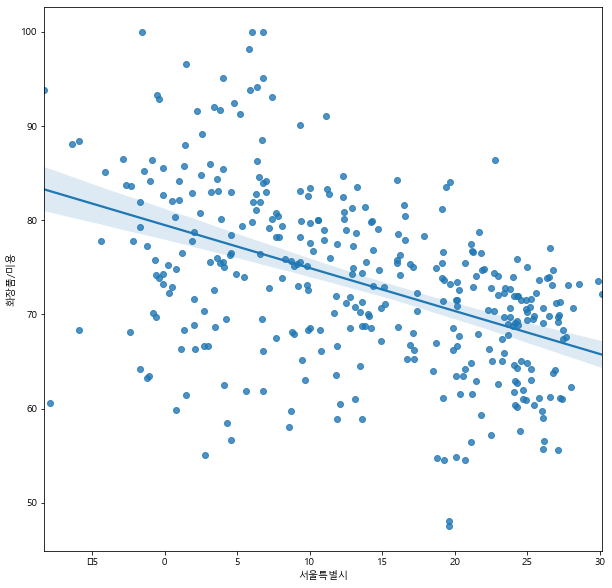

In [173]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="서울특별시", y="화장품/미용", data=weatherShop)

In [140]:
display(seoulWeather.head(2))
display(naverShopFaFo.head(2))
display(seoulWeather.count())
display(naverShopFaFo.count())

,city,dt,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
2928,서울특별시,2019-11-01,14.9,11.4,20.5,0.0,3.9,1.8,5.2,57.9,9.4,1011.3,1021.6,9.5
2929,서울특별시,2019-11-02,13.6,8.3,18.7,0.0,2.9,1.5,5.1,57.3,8.9,1009.9,1020.2,3.3


,productcid,productcname,level,productpath,productvalue,dt
0,50000000,패션의류,L1,패션의류,59.1446,2019-11-01
1,50000001,패션잡화,L1,패션잡화,60.8660,2019-11-01


city                     366
dt                       366
temp_avg                 366
temp_min                 366
temp_max                 366
amount_of_rain           366
wind_vel_max             366
wind_vel_avg             366
dewpoint_avg             366
r_humidity               366
vapor_pressure_avg       366
station_pressure_avg     366
sealevel_pressure_avg    366
daylight_hour            366
dtype: int64

productcid      4026
productcname    4026
level           4026
productpath     4026
productvalue    4026
dt              4026
dtype: int64

In [142]:
scPlotRaw = pd.merge(naverShopFaFo, seoulWeather, left_on = 'dt', right_on = 'dt', how = 'outer')
display(scPlotRaw.head(2))
display(scPlotRaw.count())

,productcid,productcname,level,productpath,productvalue,dt,city,temp_avg,temp_min,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,50000000,패션의류,L1,패션의류,59.1446,2019-11-01,서울특별시,14.9,11.4,20.5,0.0,3.9,1.8,5.2,57.9,9.4,1011.3,1021.6,9.5
1,50000001,패션잡화,L1,패션잡화,60.8660,2019-11-01,서울특별시,14.9,11.4,20.5,0.0,3.9,1.8,5.2,57.9,9.4,1011.3,1021.6,9.5


productcid               4026
productcname             4026
level                    4026
productpath              4026
productvalue             4026
dt                       4026
city                     4026
temp_avg                 4026
temp_min                 4026
temp_max                 4026
amount_of_rain           4026
wind_vel_max             4026
wind_vel_avg             4026
dewpoint_avg             4026
r_humidity               4026
vapor_pressure_avg       4026
station_pressure_avg     4026
sealevel_pressure_avg    4026
daylight_hour            4026
dtype: int64

<AxesSubplot:xlabel='temp_avg', ylabel='productvalue'>

/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lab02/.conda/envs/awsvenv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


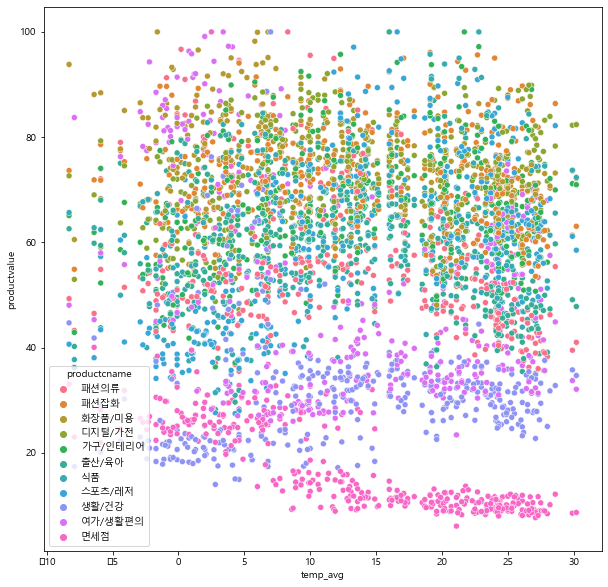

In [143]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="temp_avg", y="productvalue", hue= 'productcname', data=scPlotRaw)

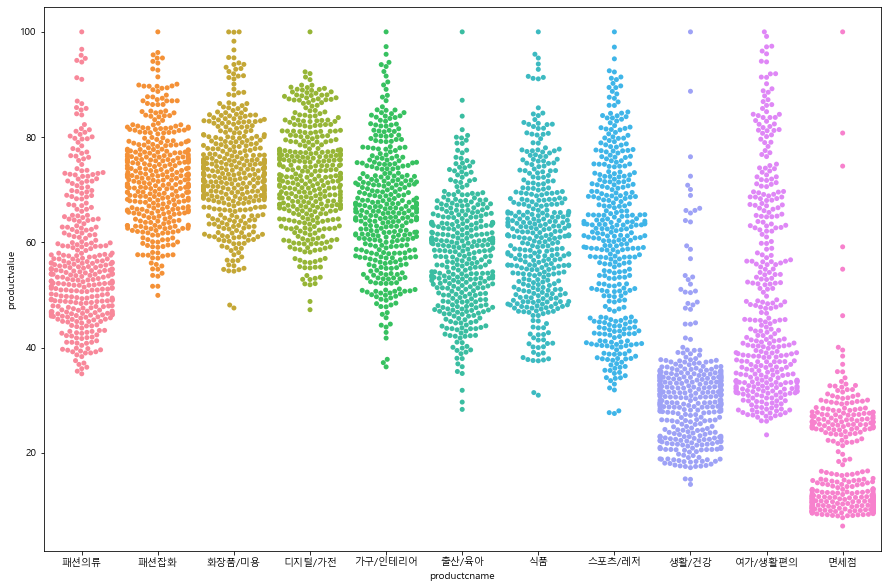

In [150]:
# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
fig, ax = plt.subplots(figsize=(15,10))
sns.swarmplot(x="productcname",      #x축 변수
              y="productvalue",        #y축 변수
              data=scPlotRaw)      
plt.show()

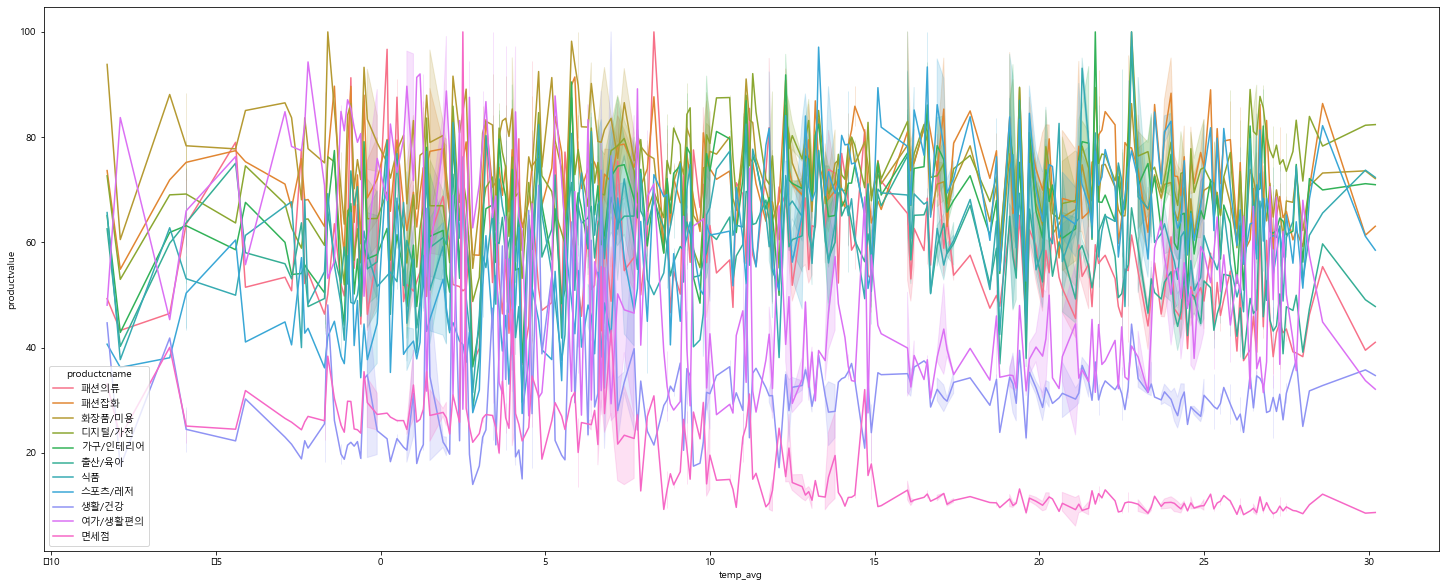

In [168]:
# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(x="temp_avg",      #x축 변수
              y="productvalue", #y축 변수
              hue='productcname',
              data=scPlotRaw)      
plt.show()
# temp_avg	temp_min	temp_max	amount_of_rain	wind_vel_max	
# wind_vel_avg	dewpoint_avg	r_humidity	vapor_pressure_avg	station_pressure_avg	sealevel_pressure_avg	daylight_hour

In [172]:
display(weatherShop2)

,dt,서울특별시,가구/인테리어,디지털/가전,면세점,생활/건강,스포츠/레저,식품,여가/생활편의,출산/육아,...,temp_max,amount_of_rain,wind_vel_max,wind_vel_avg,dewpoint_avg,r_humidity,vapor_pressure_avg,station_pressure_avg,sealevel_pressure_avg,daylight_hour
0,2019-11-01,14.9,47.7528,65.4550,24.56900,18.3925,49.8320,44.5665,67.0362,48.8279,...,20.5,0.0,3.9,1.8,5.2,57.9,9.4,1011.3,1021.6,9.5
1,2019-11-02,13.6,52.5204,63.1223,28.32050,17.6089,54.1799,40.7840,65.6891,48.7601,...,18.7,0.0,2.9,1.5,5.1,57.3,8.9,1009.9,1020.2,3.3
2,2019-11-03,14.7,65.5908,70.3923,32.02960,20.8924,65.1526,49.3090,68.6377,56.3363,...,22.1,0.0,4.7,2.1,5.9,57.8,9.3,1009.6,1019.8,7.8
3,2019-11-04,13.8,65.4761,71.8384,27.68780,22.8475,64.2346,58.2343,71.3535,59.4044,...,20.3,0.0,3.7,2.1,5.1,57.8,8.8,1011.5,1021.8,9.7
4,2019-11-05,12.4,61.1243,69.0759,27.32400,22.0902,62.5485,58.5477,68.3009,58.4813,...,18.4,0.0,3.8,1.6,5.6,65.1,9.1,1009.0,1019.3,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-10-27,14.0,66.8088,72.8512,11.45070,34.0933,80.3407,70.2511,45.1766,65.0336,...,19.4,0.0,3.4,1.8,9.0,74.1,11.6,1010.9,1021.2,8.3
362,2020-10-28,13.8,64.7570,70.7900,11.33350,32.9514,74.3511,68.8408,43.2970,60.6466,...,18.2,0.0,4.8,2.5,2.8,52.1,8.2,1012.6,1022.8,9.2
363,2020-10-29,10.8,61.8701,68.3862,9.65172,31.4241,70.4332,63.2592,42.3181,57.4309,...,16.1,0.0,4.5,2.0,-2.6,40.3,5.1,1013.7,1024.1,9.0
364,2020-10-30,11.9,54.5494,63.4546,8.92203,27.7176,60.8454,53.3971,41.5517,48.7014,...,19.6,0.0,3.2,1.5,-0.8,42.9,5.8,1015.2,1025.5,9.7
